In [247]:
#IMPORT RELEVANT PACKAGES: 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random

In [248]:
df1= pd.read_csv('student-mat.csv',sep=';') 
df2= pd.read_csv('student-por.csv',sep=';') 
df=df1.merge(df2,how='outer',on=df1.columns.tolist()) 
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
142,GP,F,15,U,GT3,T,4,4,teacher,services,...,4,2,2,1,1,5,2,9,11,11
678,GP,M,16,U,GT3,T,3,3,at_home,other,...,5,3,3,1,3,2,4,9,11,10
829,MS,F,16,U,LE3,A,2,2,at_home,other,...,1,2,1,1,1,1,4,10,9,11
124,GP,F,16,U,GT3,T,2,2,other,other,...,5,4,4,1,1,5,0,8,7,8
246,GP,M,17,U,GT3,T,2,3,other,other,...,5,2,2,1,1,2,4,12,12,13


In [249]:
df.size


34452

In [250]:
#rows
df.shape[0]

1044

In [251]:
#columns
df.shape[1]

33

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [253]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [254]:
df.shape
unique_counts = df.nunique()
unique_counts


school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

In [255]:
def boxanddistplot(df):
    unique_counts = df.nunique()
    selected_columns = unique_counts[unique_counts >= 6].index.tolist()
    for column_name in selected_columns:
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=column_name,data=df)
        plt.title(f"box Plot of {column_name}",fontsize=16,loc='center')
        plt.xlabel(f"{column_name}")
        plt.subplot(1,2,2)
        sns.histplot(df[column_name], kde=True,bins=df[column_name].nunique() ,kde_kws=dict(cut=3))
        plt.xlabel(f"{column_name}")
        plt.ylabel('no of students')
        plt.title(f" Histogram of {column_name}",fontsize=16,loc='center')
        plt.show()
    

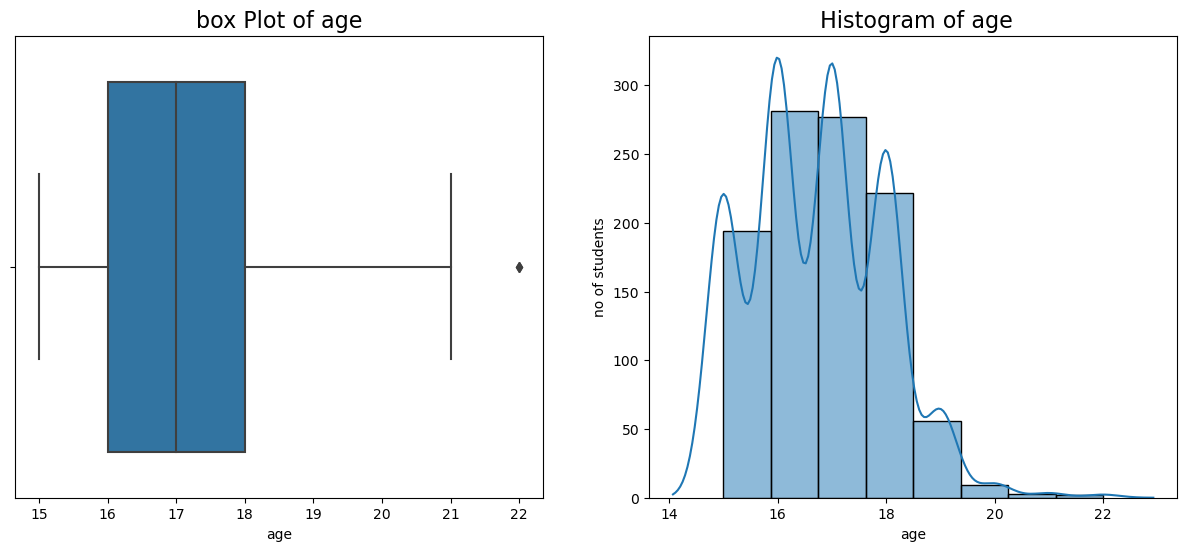

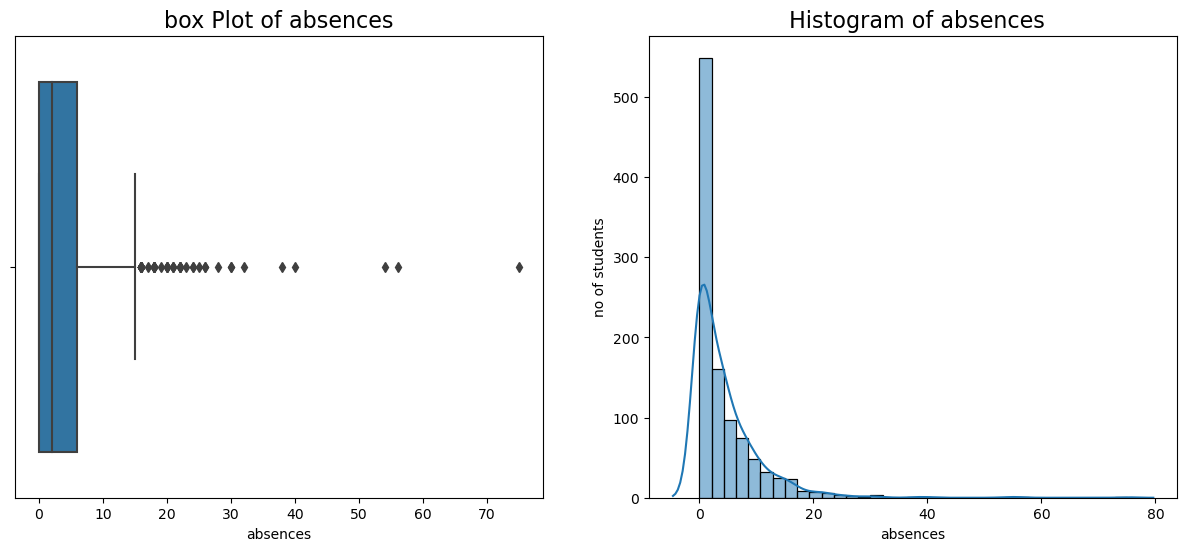

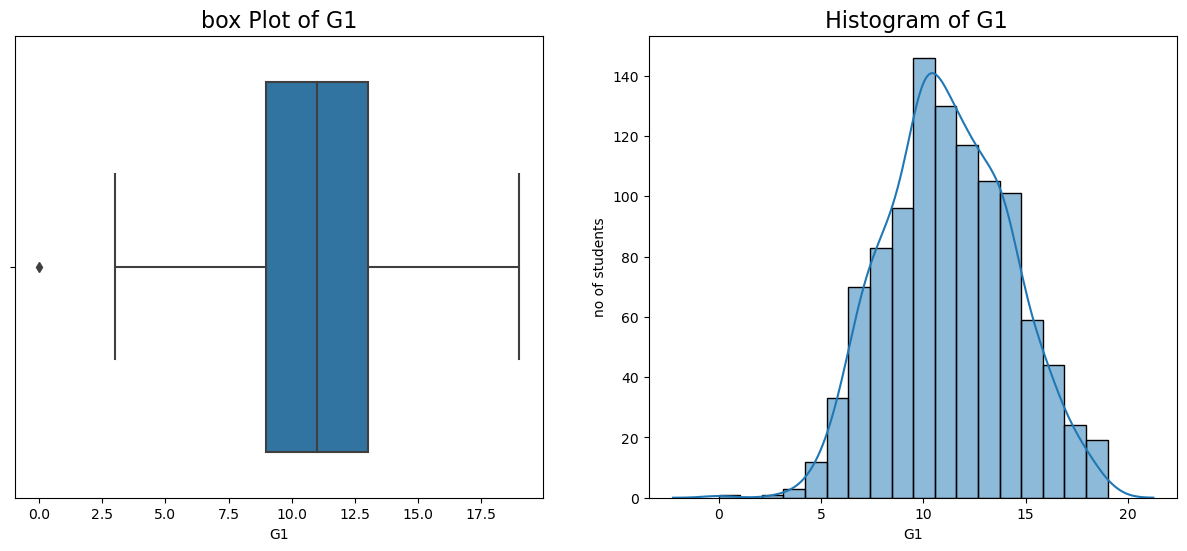

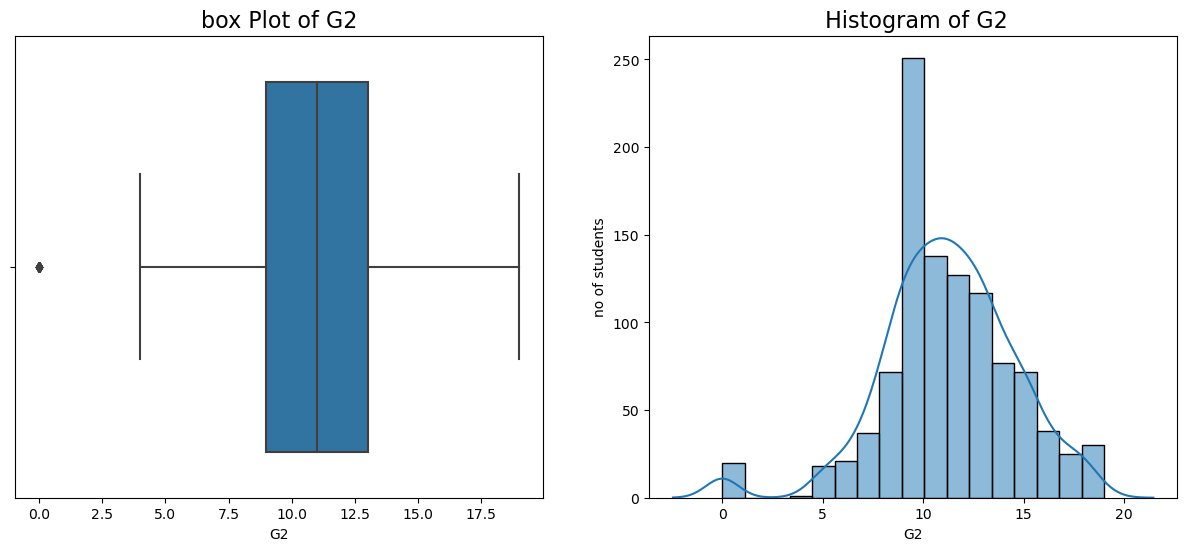

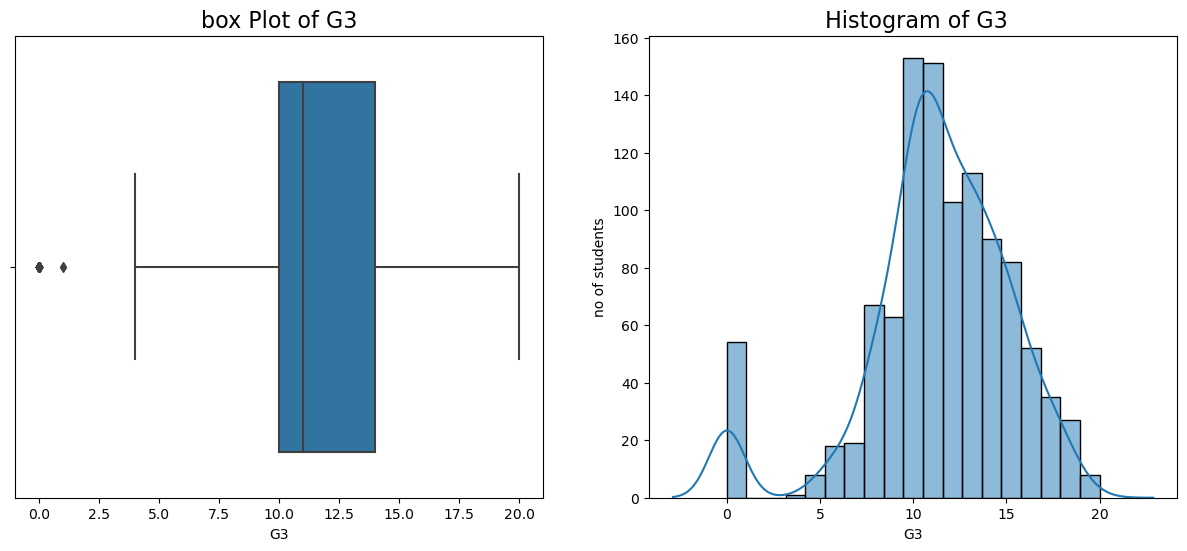

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [256]:
boxanddistplot(df)
df.describe()

In [263]:
def plot_categorical_columns(df):
    # Get the list of categorical columns in the DataFrame
    dfcopy=df.copy(deep=True)
    dfcopy.columns= ["school","sex","age", "home address type","family size","parent's cohabitation status","mother's education",\
"father's education","mother's job","father's job","reason to choose this school","student's guardian",\
"home to school travel time","weekly study time","number of past class failures","extra educational support",\
"family educational support","extra paid classes within the course subject","extra-curricular activities",\
"attended nursery school","wants to take higher education","Internet access at home", "with a romantic relationship",\
"quality of family relationships","free time after school","going out with friends","workday alcohol consumption",\
"weekend alcohol consumption","current health status","number of school absences","first period grade", "second period grade","final grade"]
    unique_counts = dfcopy.nunique()
    selected_columns = unique_counts[unique_counts <= 6].index.tolist()

    # Iterate over each categorical column and plot countplot and pie chart
    for column_name  in  selected_columns:
        plot_allplot(dfcopy, column_name,xlabel=column_name)
        

In [264]:
def plot_allplot(df, column_name,xlabel=None,ylabel="No of students",title=None):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return
    
    fig=plt.figure(figsize=(15, 5))
    if title is None:
        title=f"Distribution of Students according to {column_name}"
        fig.suptitle(title,fontsize=19)
    else:
        fig.suptitle(title,fontsize=20)
    plt.subplot(1, 2, 1)
    df[column_name].astype('category')
    order = df[column_name].value_counts().index
    ax=sns.countplot(x=column_name, data=df,order=order,palette="viridis")
    if xlabel is not None:
        plt.xlabel(xlabel,fontsize=10)
    if ylabel is not None:
        plt.ylabel(ylabel,fontsize=10)
    handles, labels = [], []
    for i, category in enumerate(order):
        count = df[column_name].value_counts()[category]
        handles.append(plt.Line2D([0], [0], marker='o', color=sns.color_palette("viridis")[i], markersize=8))
        labels.append(f'{category} ({count})')
    plt.legend(handles, labels, title=f'{column_name} categories', loc='center left', bbox_to_anchor=(1, 0.1))
    plt.subplot(1, 2, 2)
    category_counts = df[column_name].value_counts()    
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=0)
    plt.legend(category_counts.index, title=f'{column_name} categories', loc='center left', bbox_to_anchor=(1, 0.1))
    plt.tight_layout()
    plt.show() 

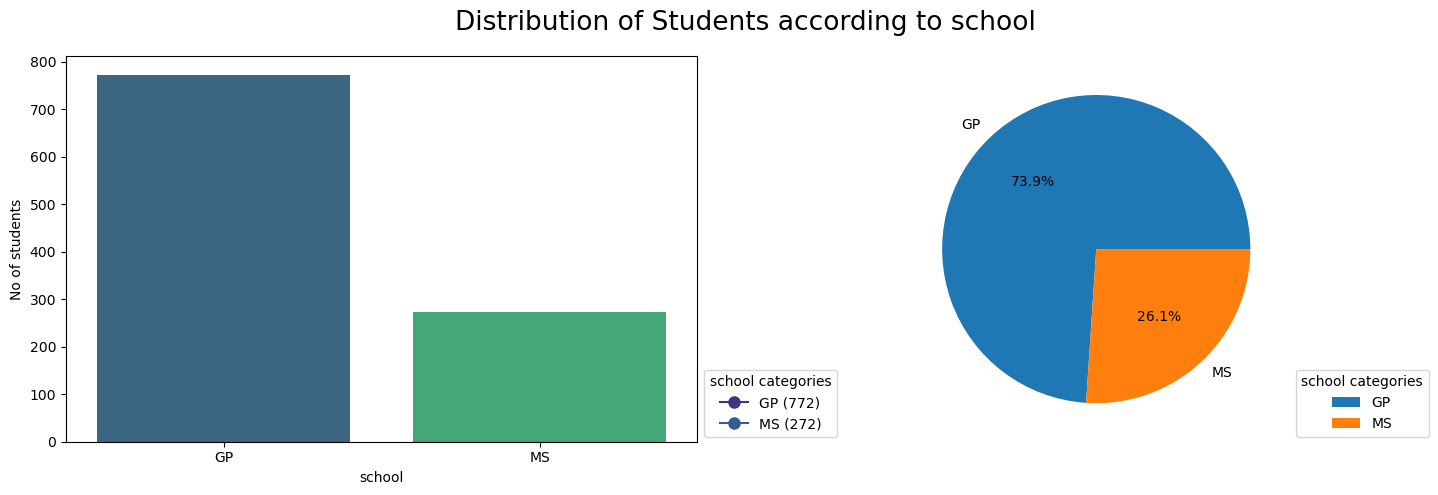

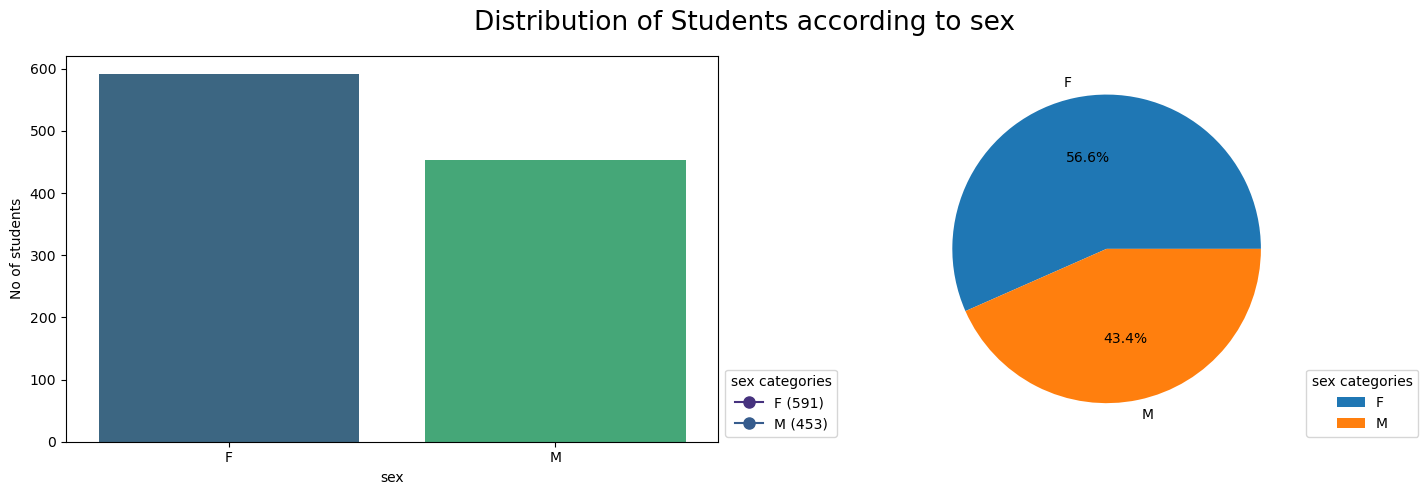

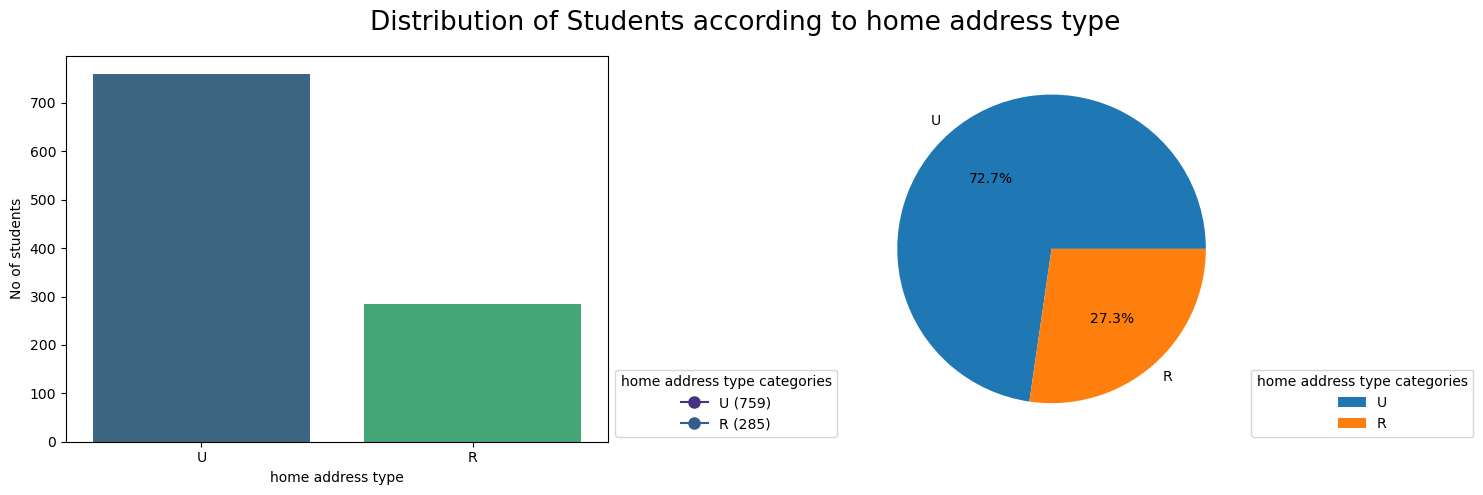

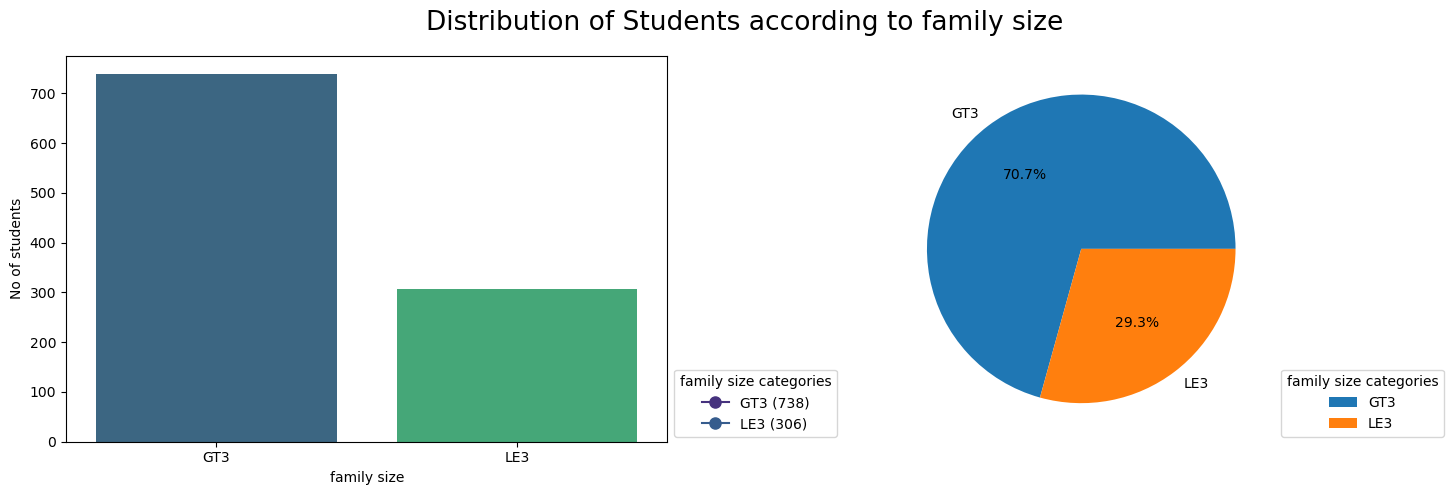

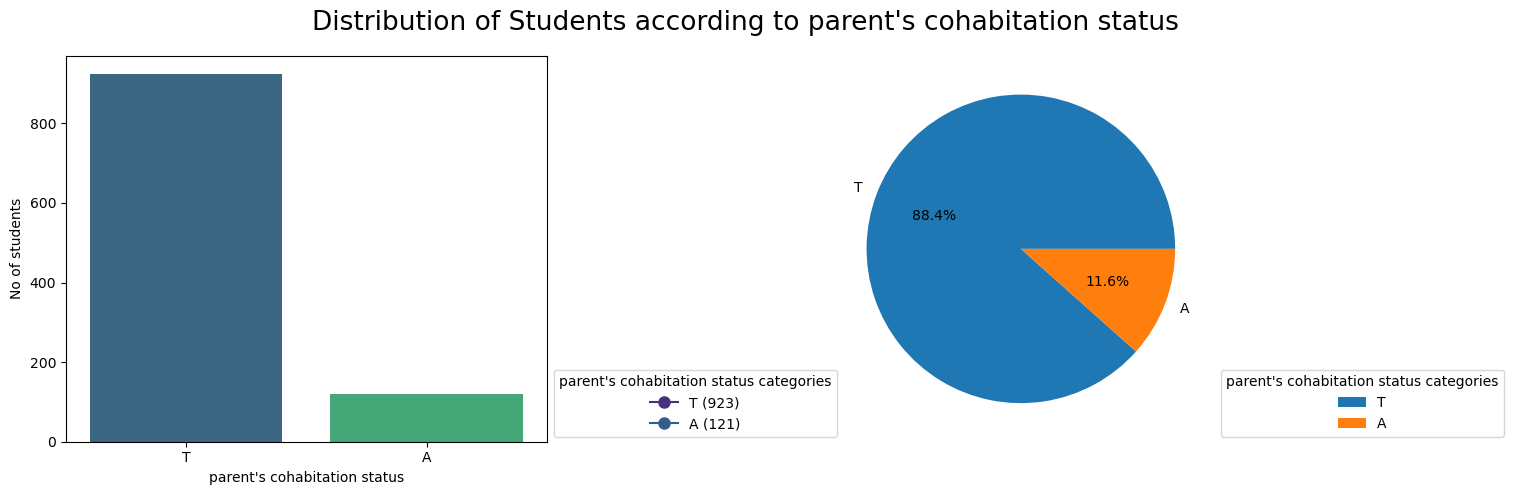

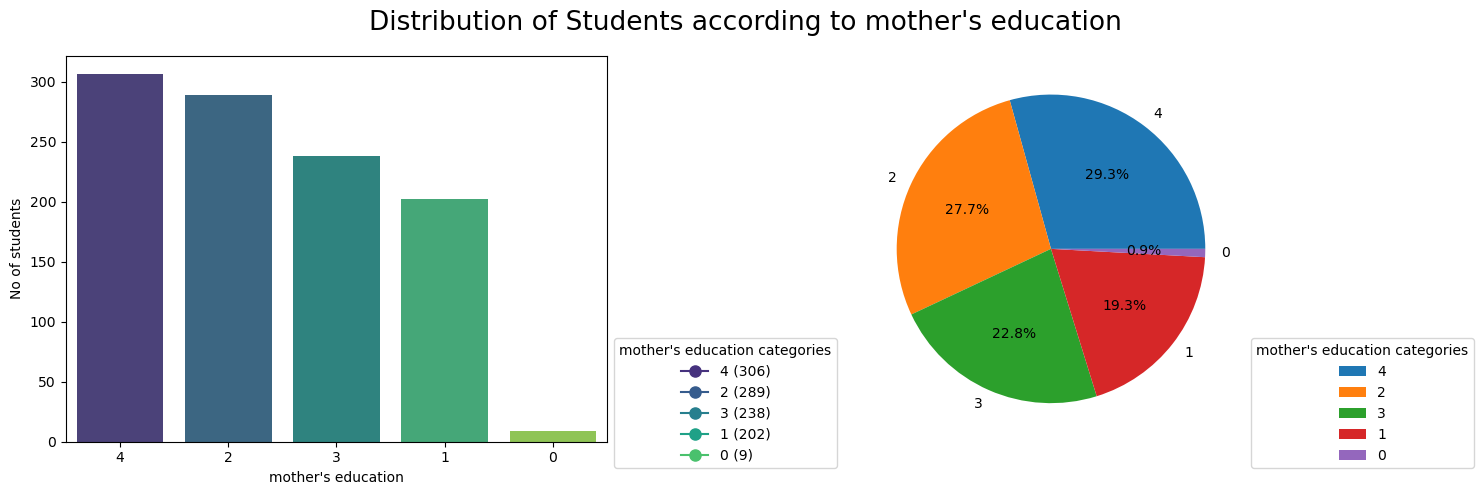

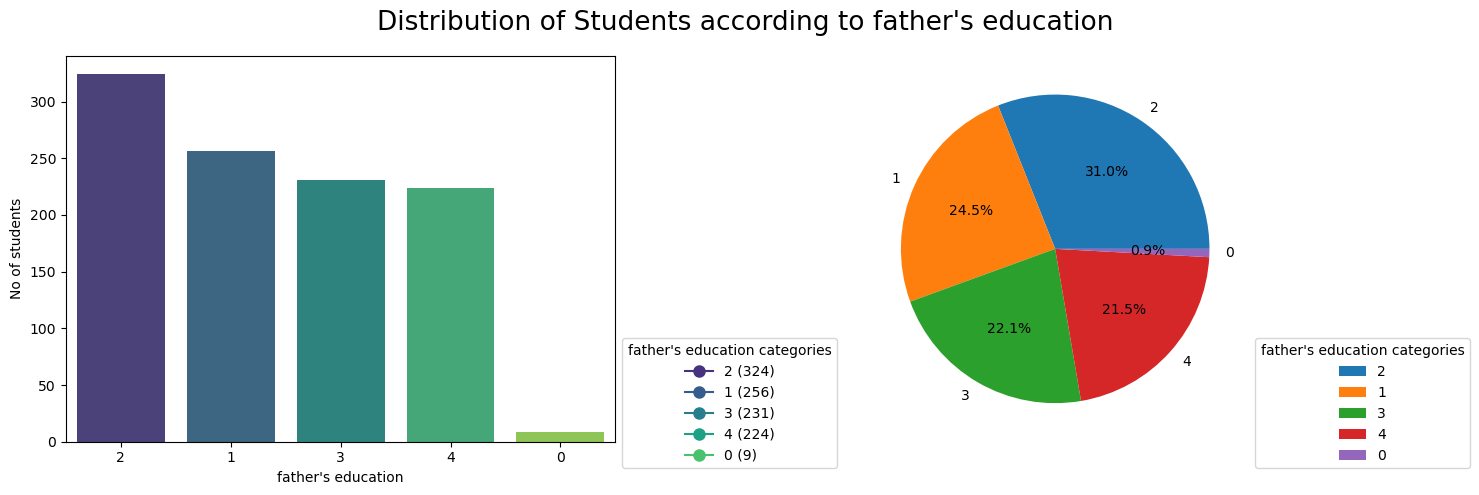

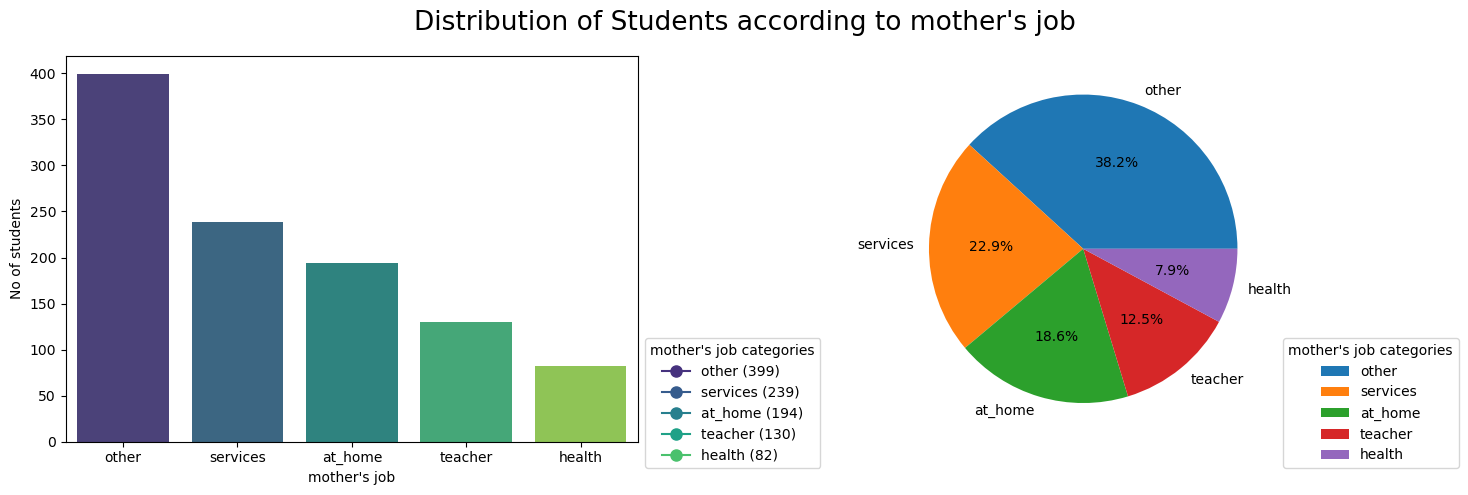

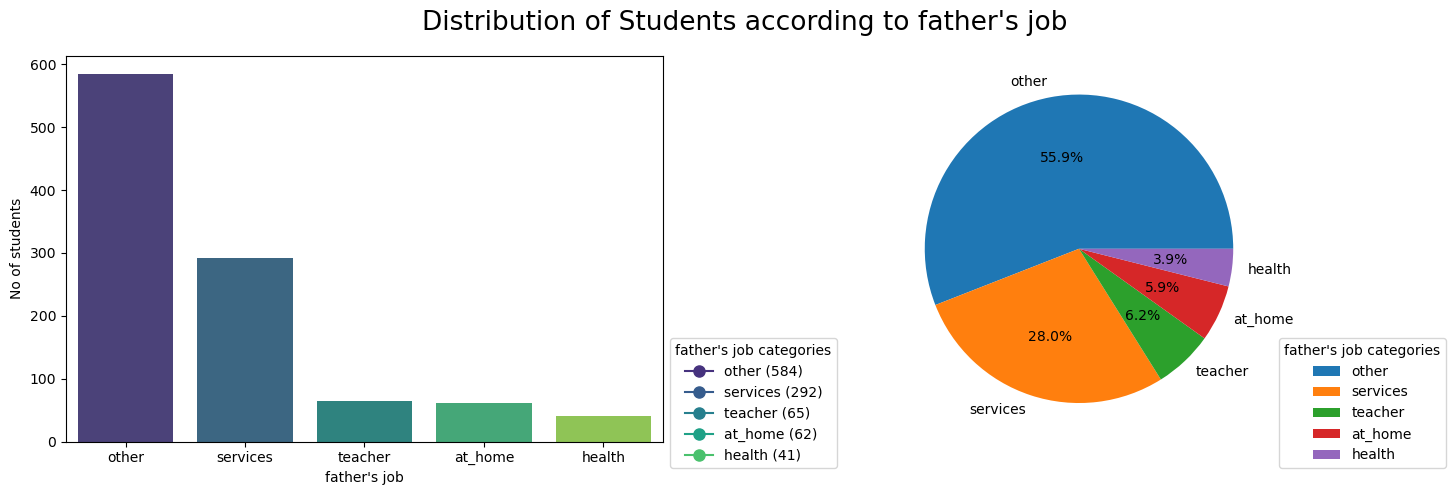

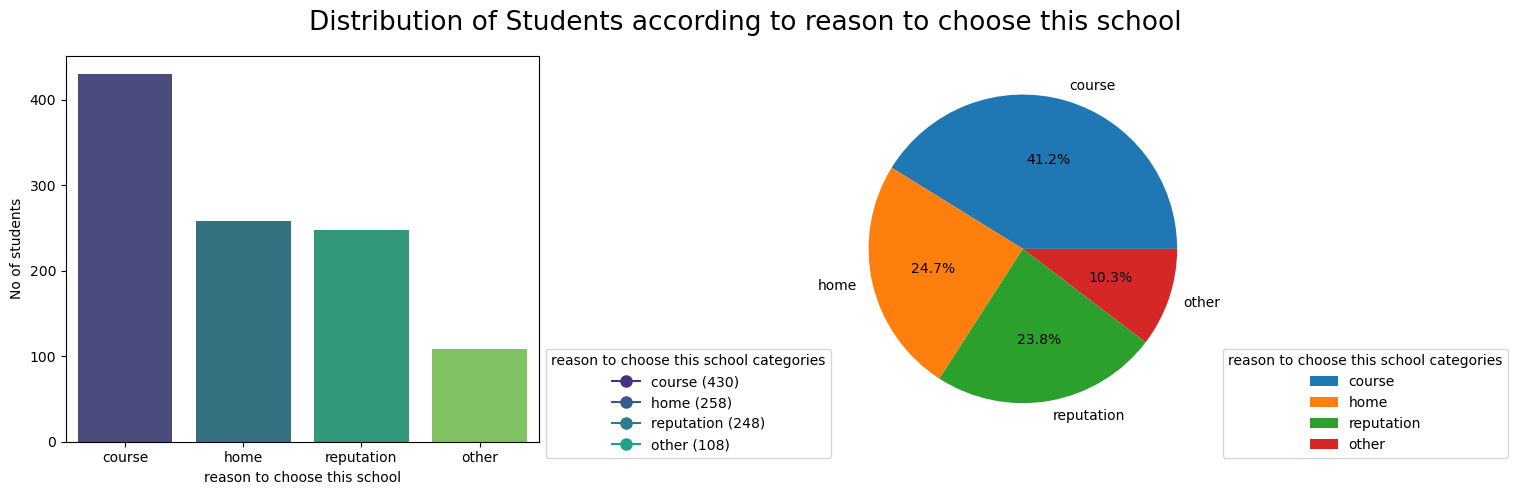

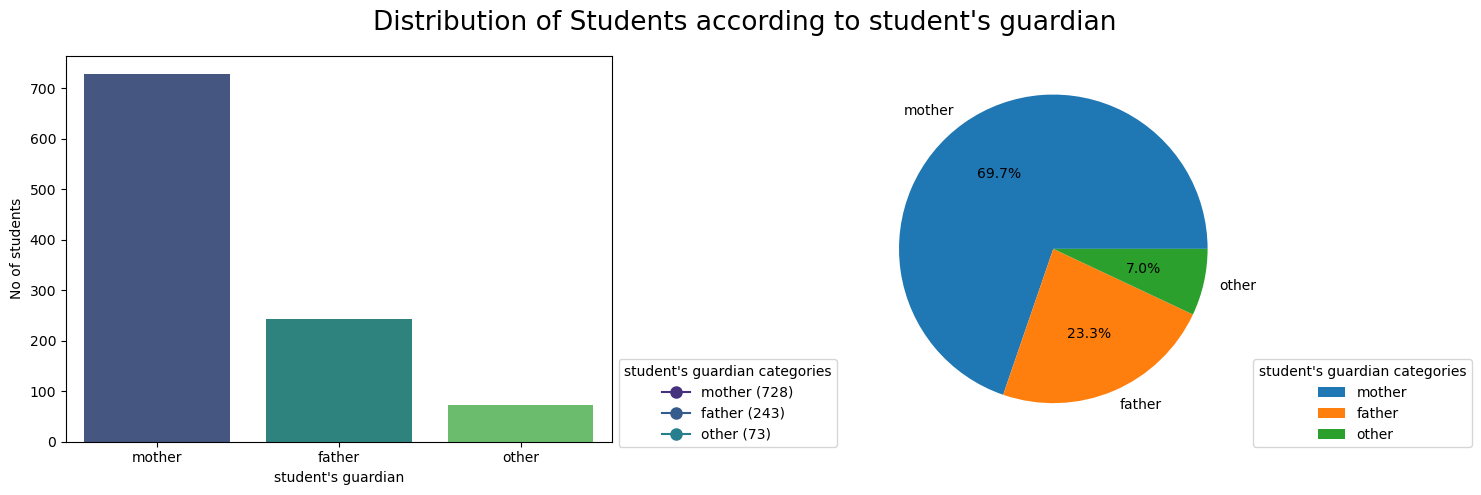

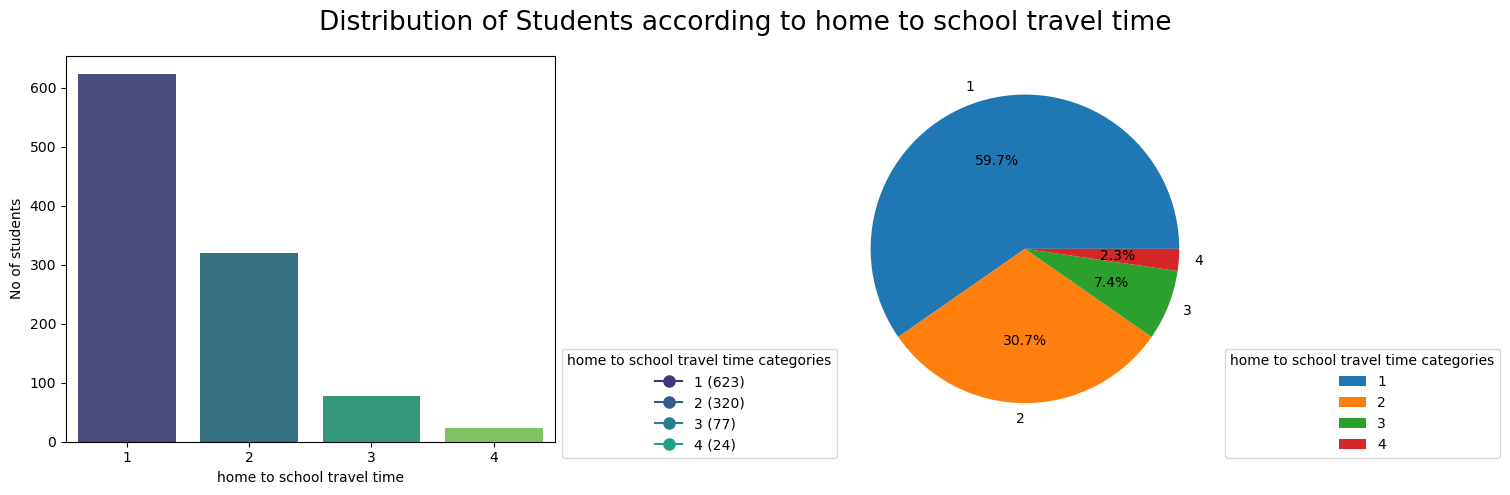

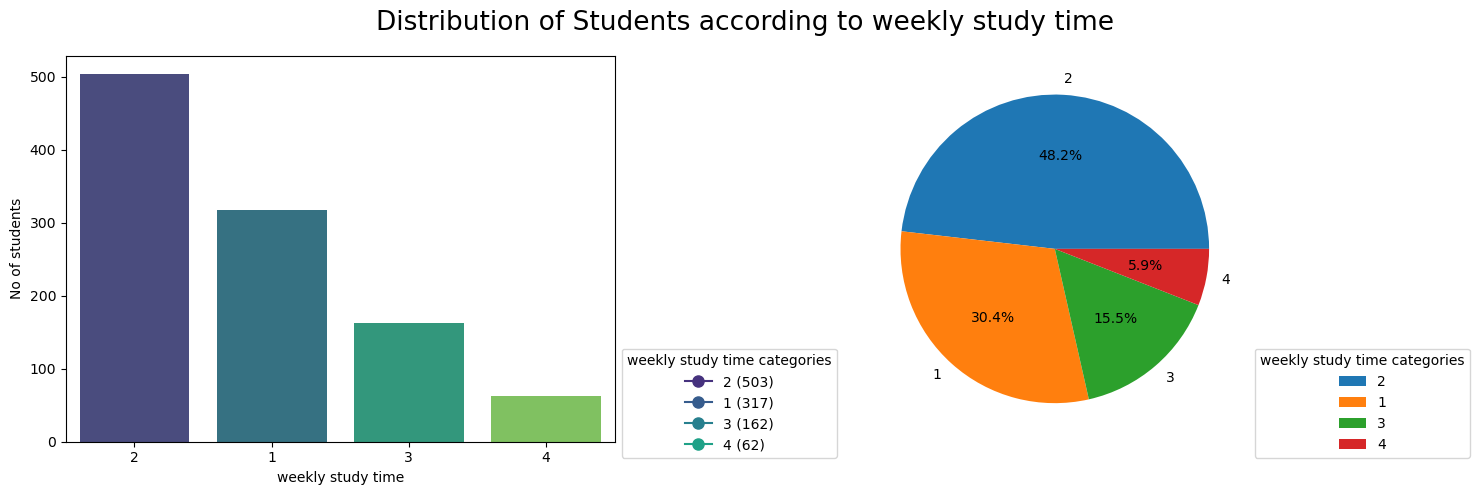

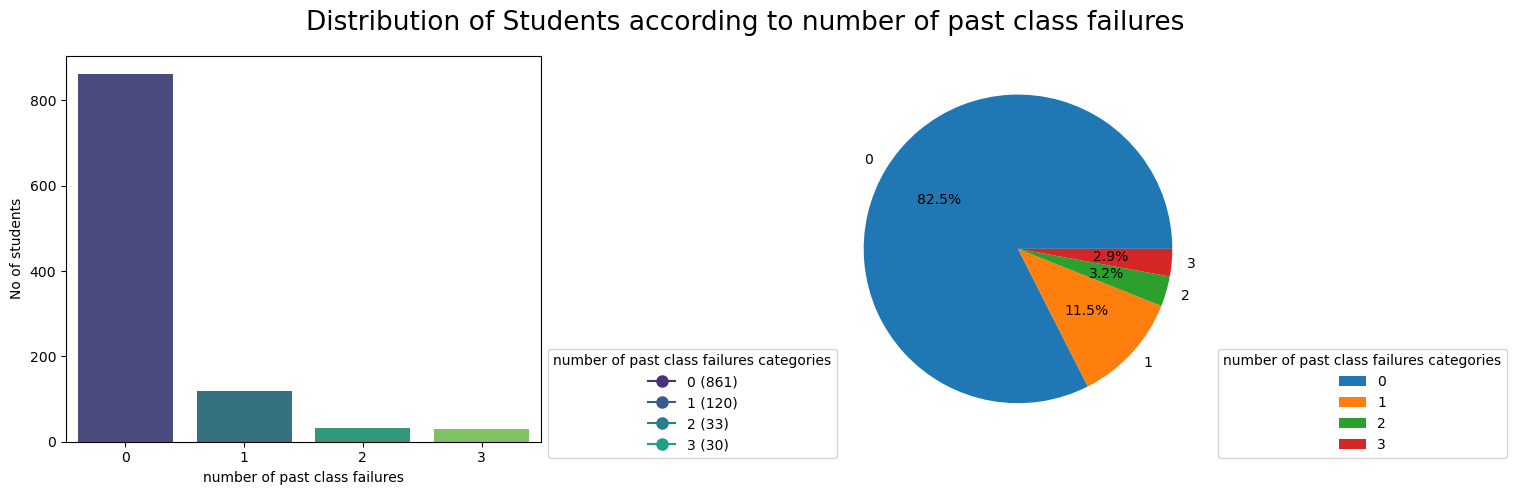

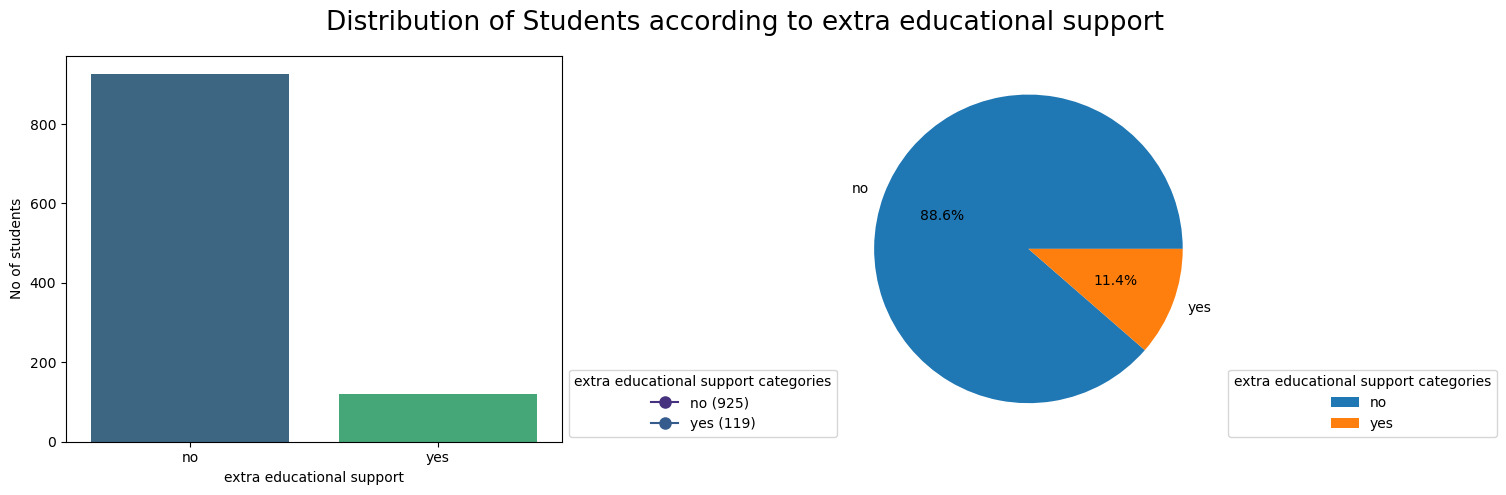

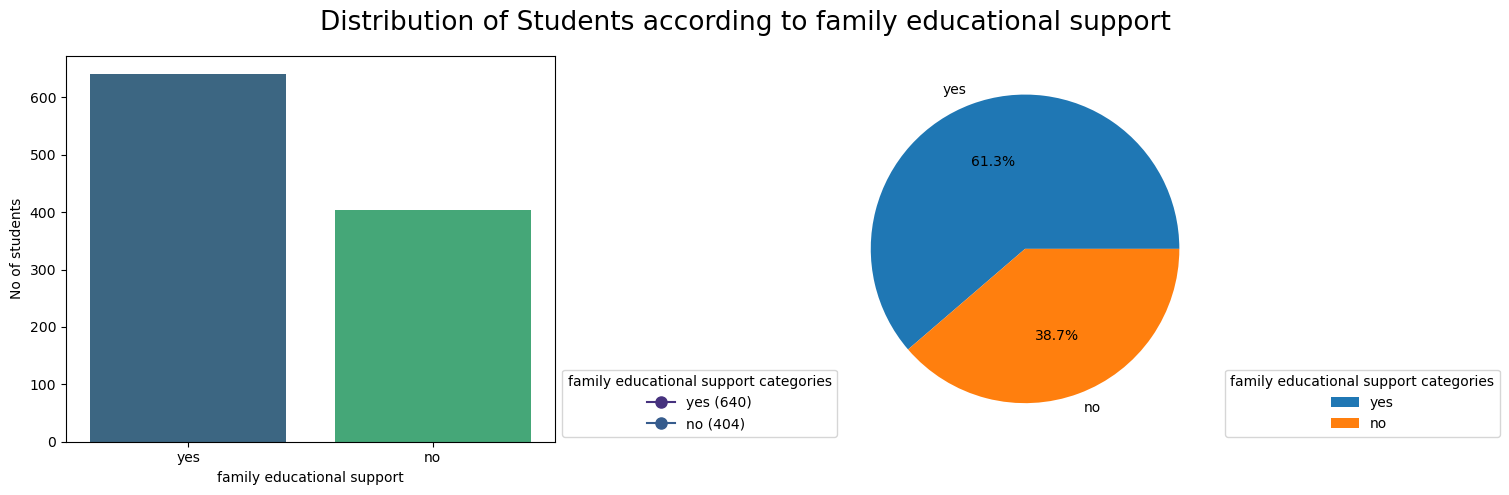

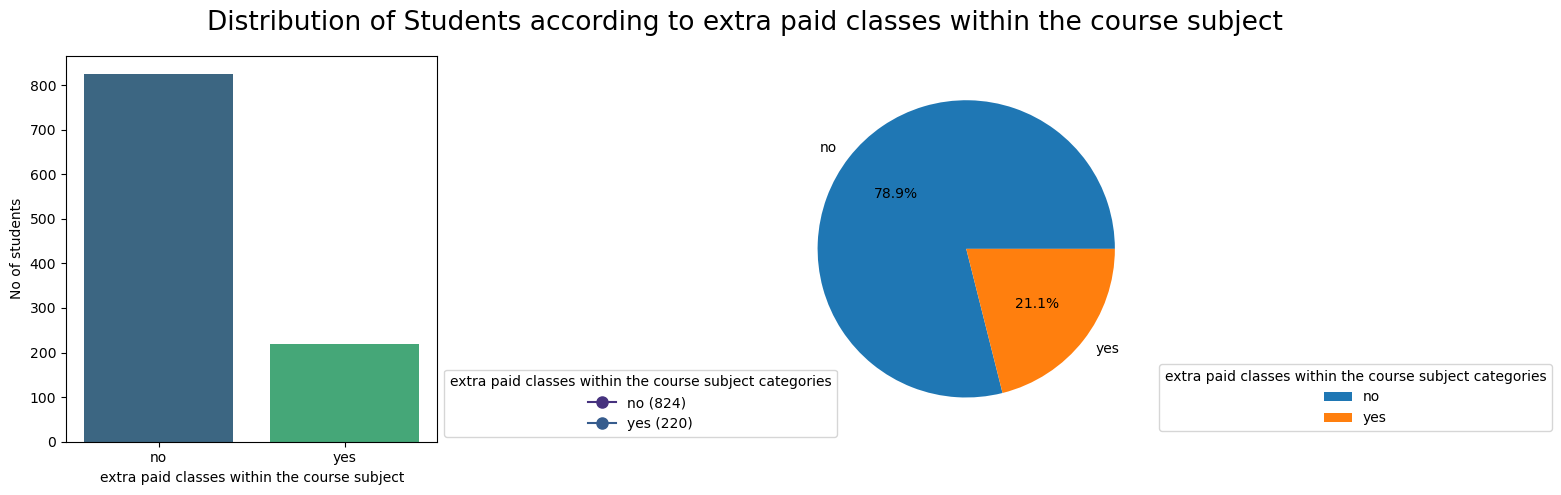

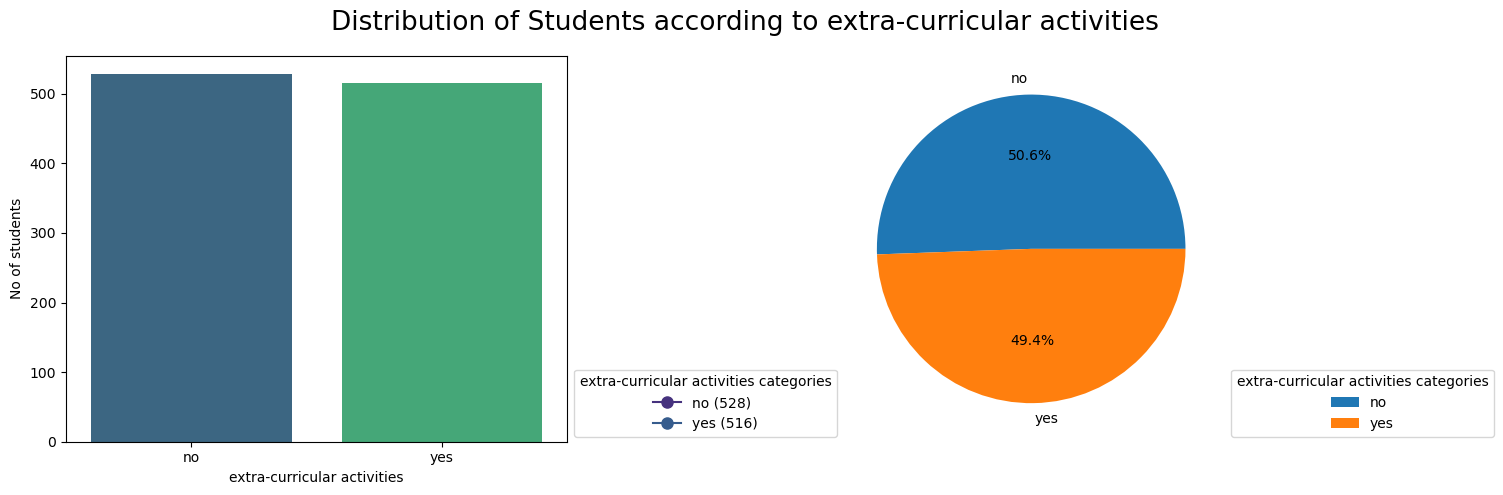

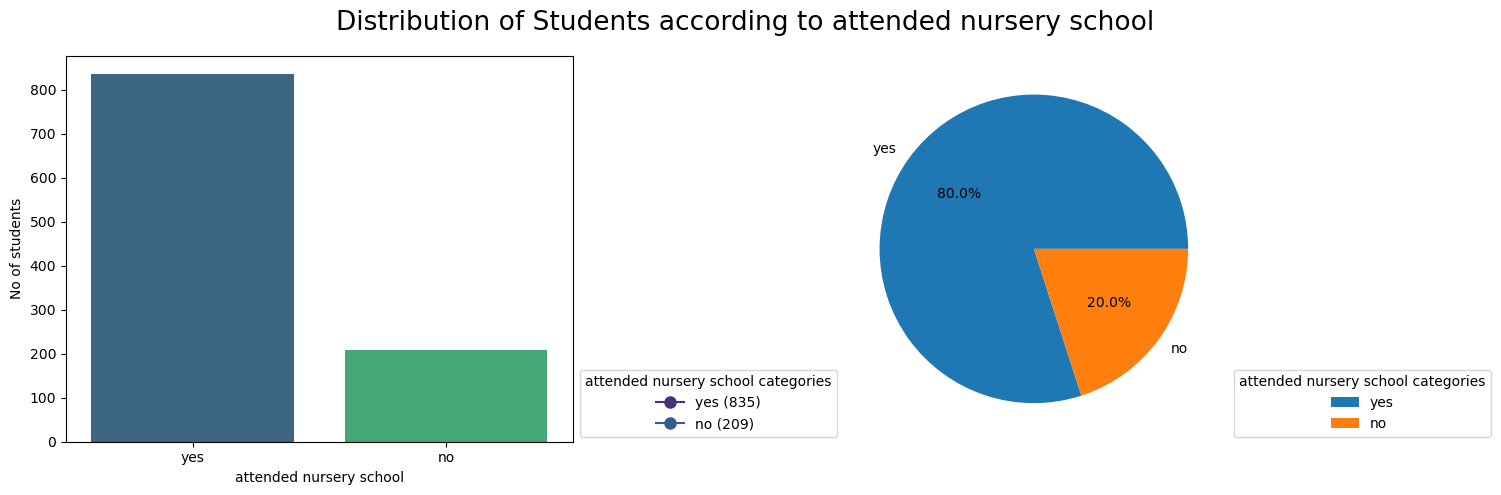

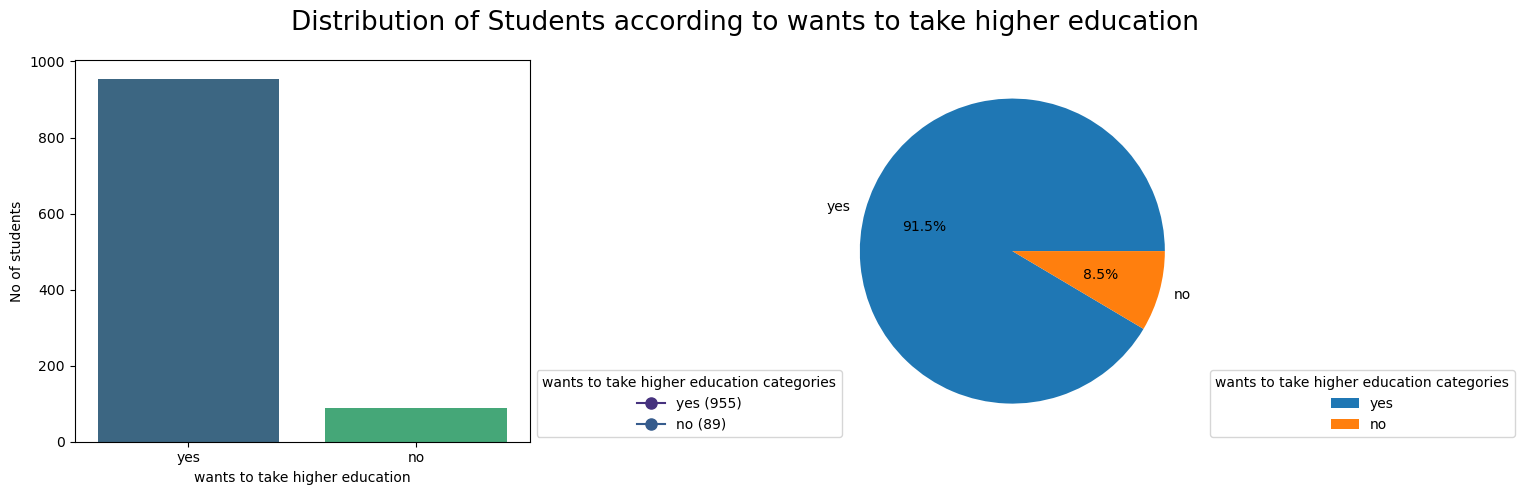

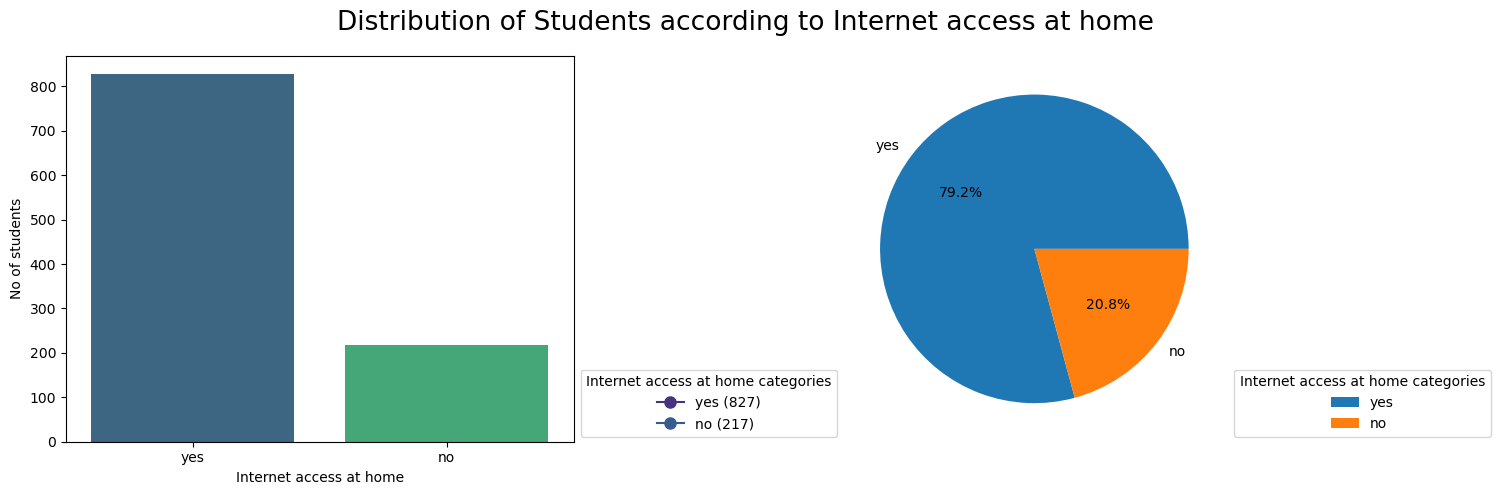

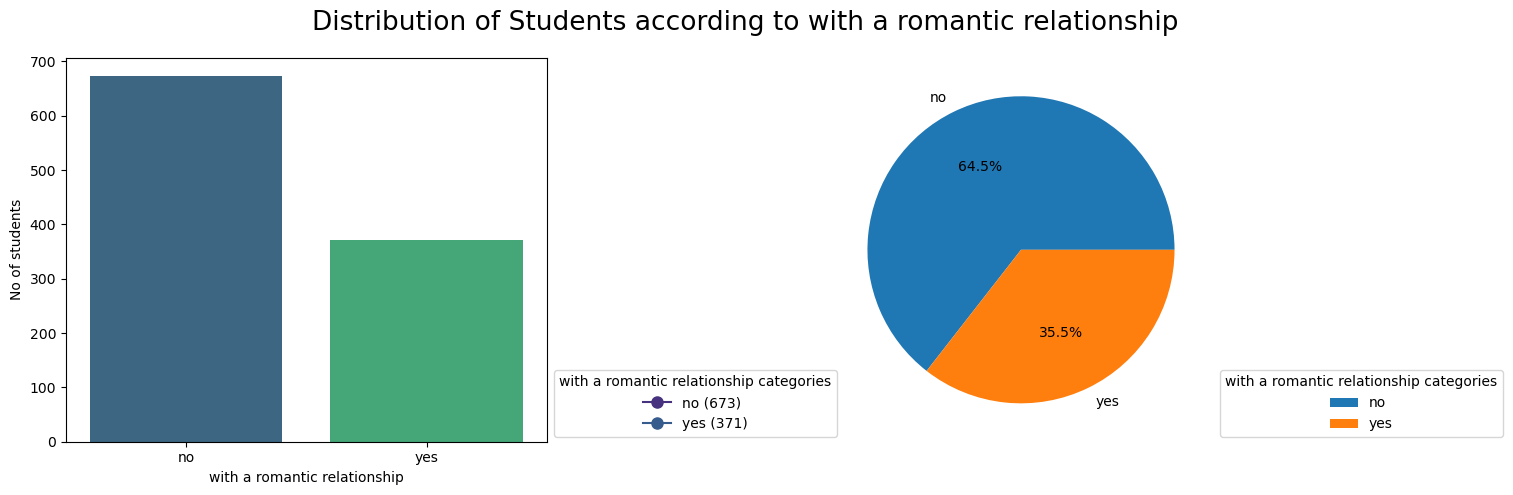

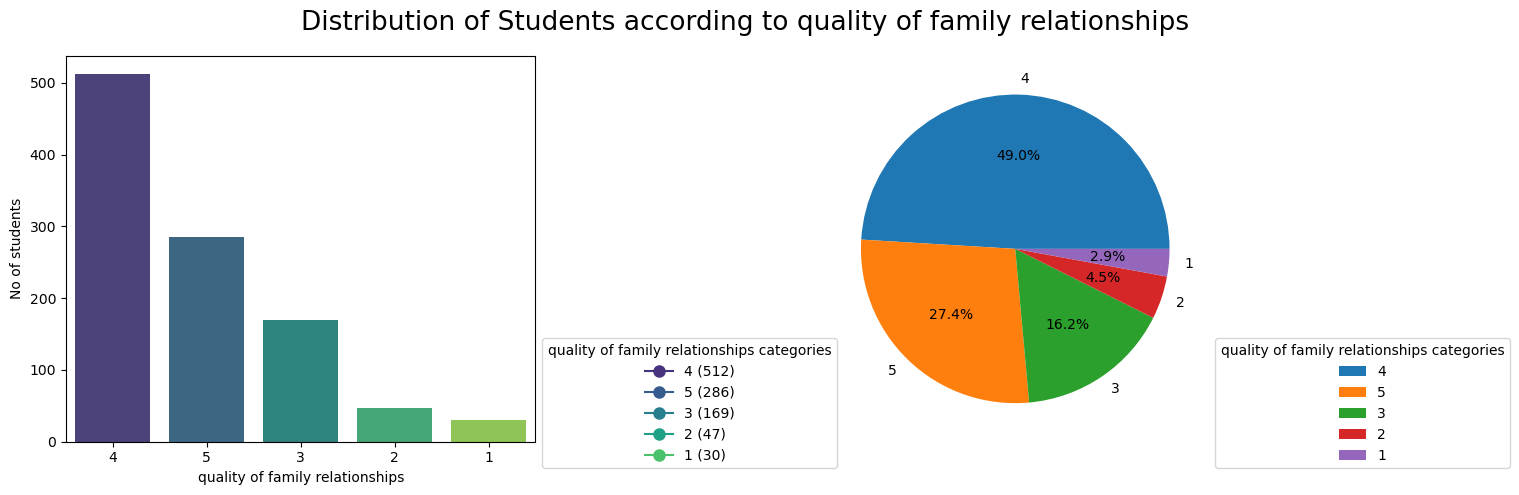

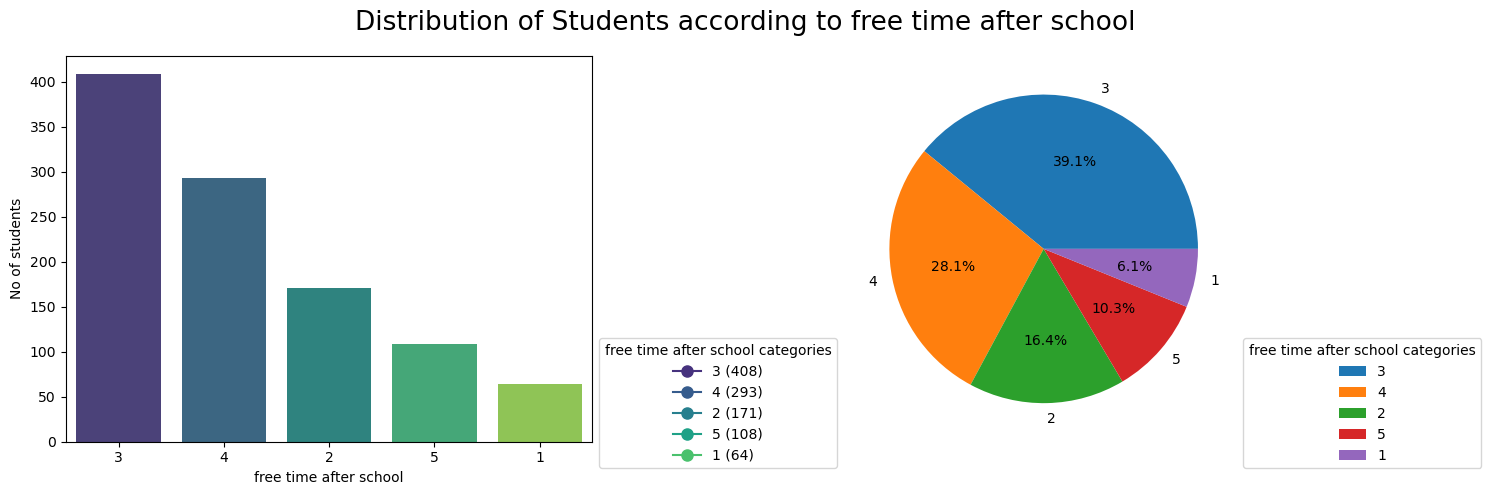

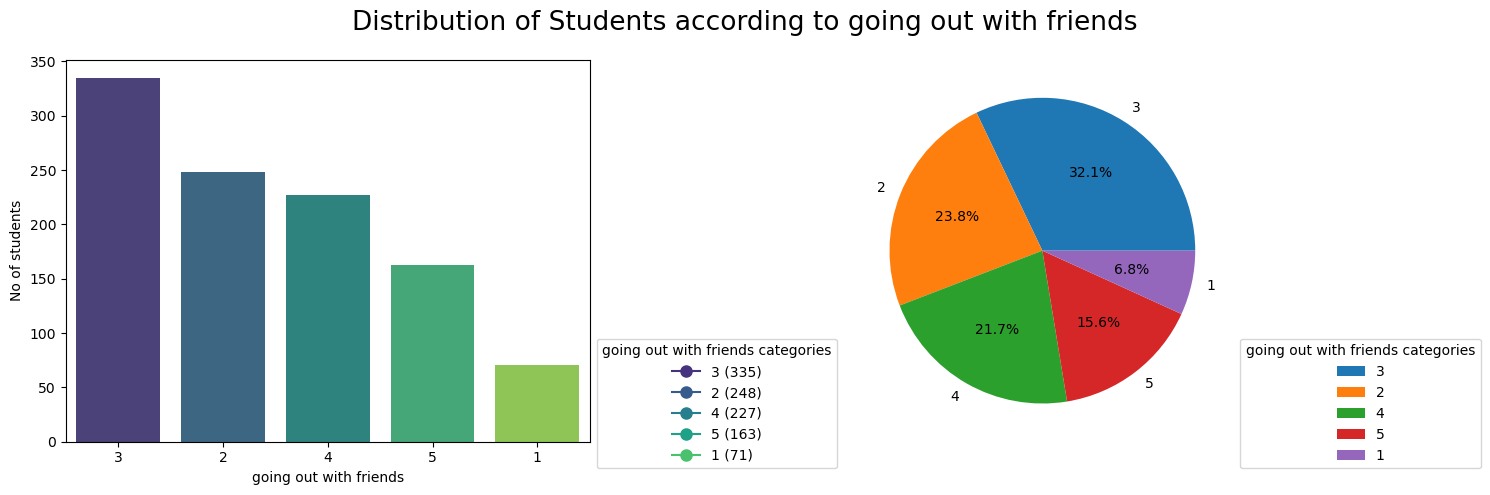

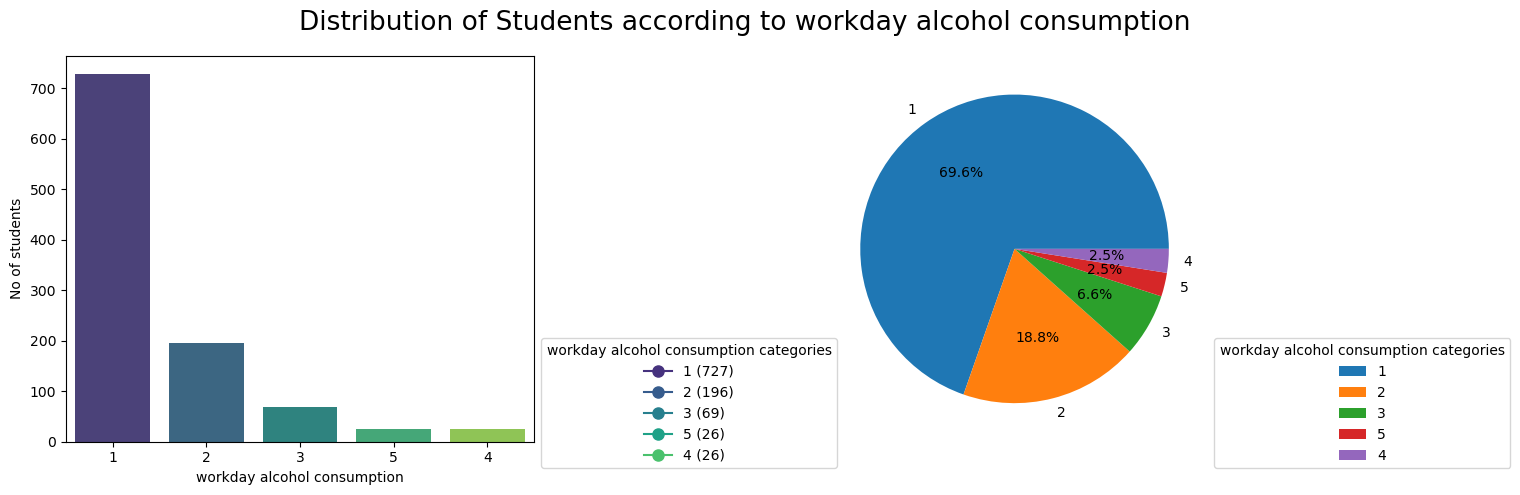

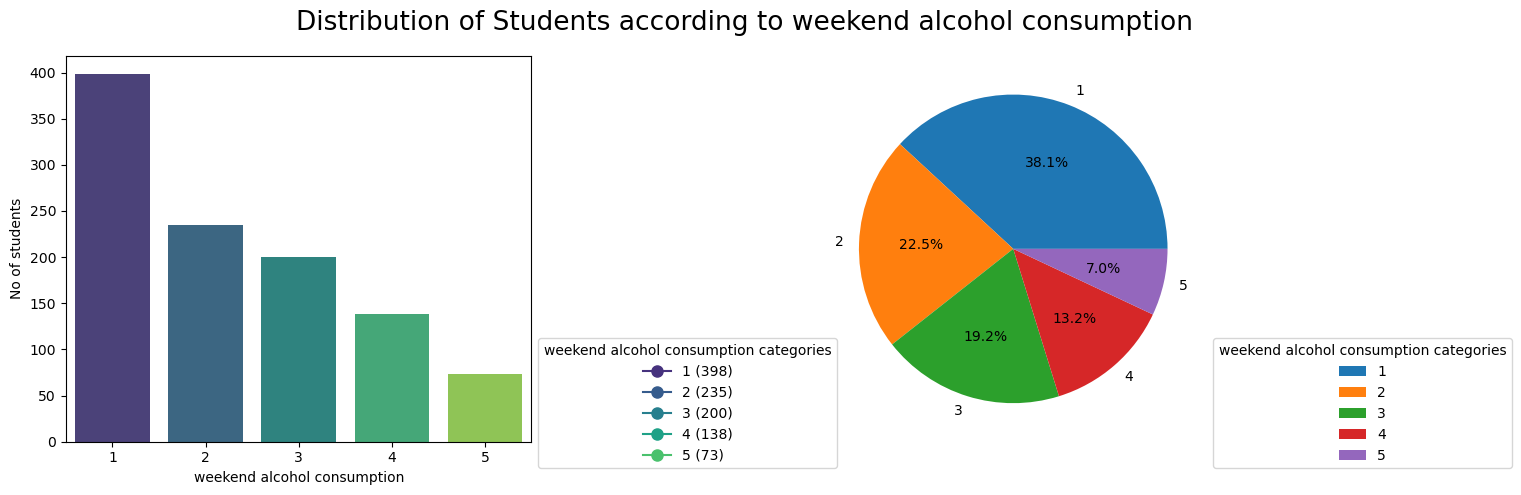

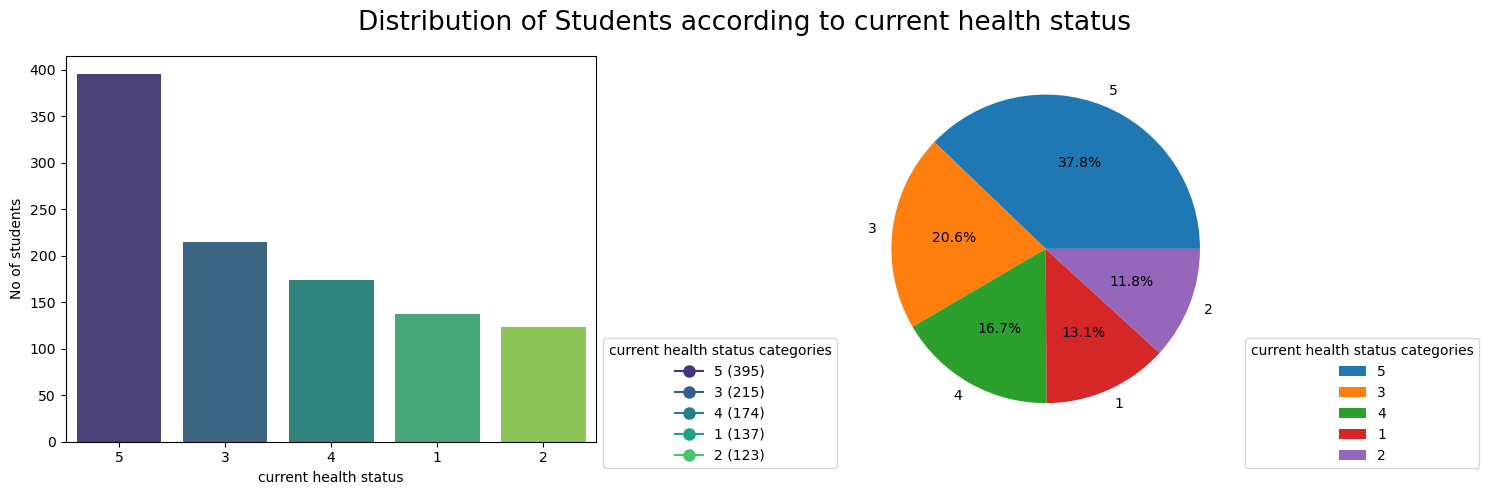

In [265]:
plot_categorical_columns(df)


In [267]:
def chi_square_association(df, categorical_column, output_column):
   
    contingency_table = pd.crosstab(df[categorical_column], df[output_column])
    associtated=[]
    BOLD = '\033[1m'
    END_BOLD = '\033[0m'
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"{BOLD}column:{categorical_column}{END_BOLD}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"{BOLD}P-value: {p}{END_BOLD}")

  
    alpha = 0.05
    print(f"Significance Level: {alpha}")
    print(f"Degrees of Freedom: {(contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)}")

    if p < alpha:
        print(f"{BOLD}There is asignificant association between '{categorical_column}' and '{output_column}{END_BOLD}'.")
        print("   ")
        return categorical_column
    else:
        print(f"There is no significant association between the variables.")
        print("   ")
        return None  

In [268]:
def check_association(df,column_name11):
    columns=[] 
    for column_name in df.columns:
        result=chi_square_association(df, column_name, output_column=column_name11)    
        if  result is not None:
            columns.append(result)
    print("Columns with significant association:")
    print(columns)
    for associatoncolums in columns:
        unique_values= df[associatoncolums].nunique()
        if unique_values >= 6:
            plt.figure(figsize=(7, 5))
            sns.scatterplot(x=associatoncolums, y=column_name11, data=df)
            plt.title(f"scatterplot  of final grade and {associatoncolums}",fontsize=16,loc='center')
            plt.xlabel(f"{associatoncolums}")
            plt.ylabel('final grades')
            plt.show()
    return columns

column:school
Chi-Square Statistic: 51.386429633761935
P-value: 4.645777082219623e-05
Significance Level: 0.05
Degrees of Freedom: 18
There is asignificant association between 'school' and 'G3'.
   
column:sex
Chi-Square Statistic: 14.242496986973054
P-value: 0.7131518483806094
Significance Level: 0.05
Degrees of Freedom: 18
There is no significant association between the variables.
   
column:age
Chi-Square Statistic: 232.31238000915275
P-value: 2.5802724734170606e-08
Significance Level: 0.05
Degrees of Freedom: 126
There is asignificant association between 'age' and 'G3'.
   
column:address
Chi-Square Statistic: 29.633448722907936
P-value: 0.04116623611698296
Significance Level: 0.05
Degrees of Freedom: 18
There is asignificant association between 'address' and 'G3'.
   
column:famsize
Chi-Square Statistic: 20.48051526168315
P-value: 0.3064264131952273
Significance Level: 0.05
Degrees of Freedom: 18
There is no significant association between the variables.
   
column:Pstatus
Chi-Squ

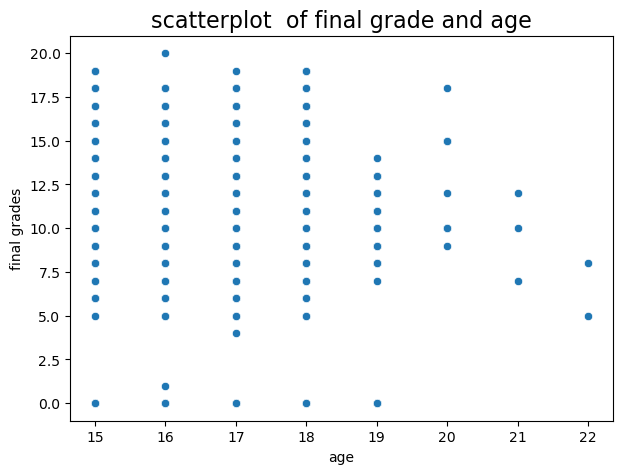

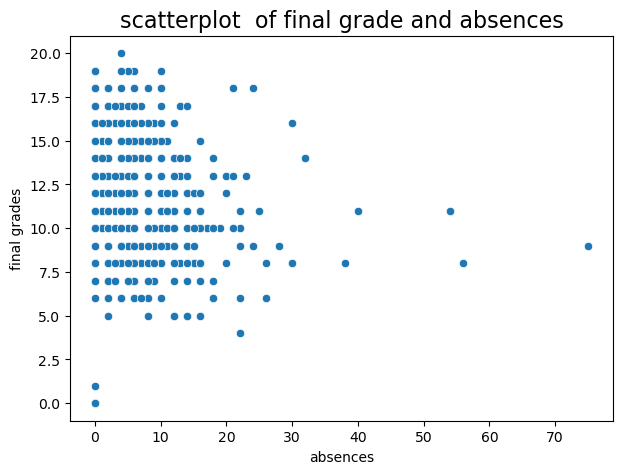

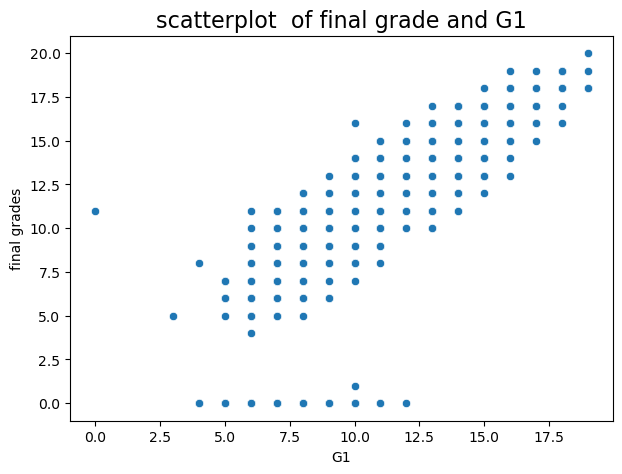

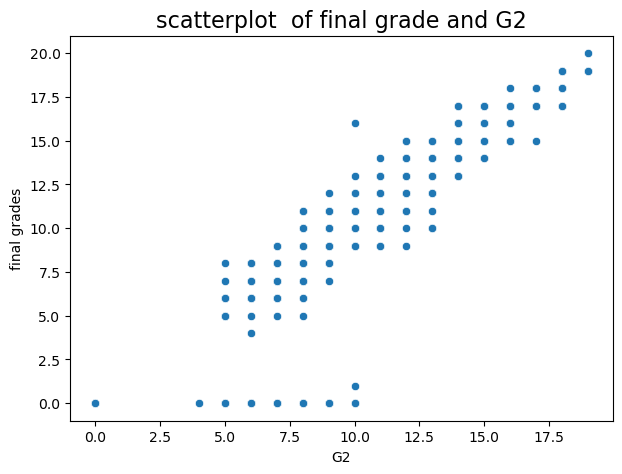

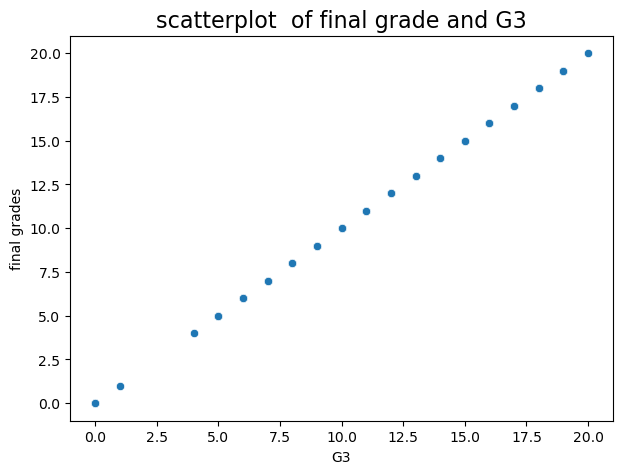

In [269]:
mycolumns=check_association(df,'G3')

In [270]:
newdf=df[mycolumns]


In [271]:
newdf=newdf.drop(columns=['address','Mjob','romantic'])

In [272]:

newdf

,school,age,Medu,Fedu,studytime,failures,schoolsup,higher,goout,Dalc,Walc,absences,G1,G2,G3
0,GP,18,4,4,2,0,yes,yes,4,1,1,6,5,6,6
1,GP,17,1,1,2,0,no,yes,3,1,1,4,5,5,6
2,GP,15,1,1,2,3,yes,yes,2,2,3,10,7,8,10
3,GP,15,4,2,3,0,no,yes,2,1,1,2,15,14,15
4,GP,16,3,3,2,0,no,yes,2,1,2,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,19,2,3,3,1,no,yes,2,1,2,4,10,11,10
1040,MS,18,3,1,2,0,no,yes,4,1,1,4,15,15,16
1041,MS,18,1,1,2,0,no,yes,1,1,1,6,11,12,9
1042,MS,17,3,1,1,0,no,yes,5,3,4,6,10,10,10


In [273]:
object_cols = newdf.select_dtypes(include=['object']).columns.tolist()

In [274]:
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'), object_cols)],remainder='passthrough')

In [275]:
df_transformed = pd.DataFrame(preprocessor.fit_transform(newdf), columns=preprocessor.get_feature_names_out(newdf.columns))
df_transformed

,onehot__school_MS,onehot__schoolsup_yes,onehot__higher_yes,remainder__age,remainder__Medu,remainder__Fedu,remainder__studytime,remainder__failures,remainder__goout,remainder__Dalc,remainder__Walc,remainder__absences,remainder__G1,remainder__G2,remainder__G3
0,0.0,1.0,1.0,18.0,4.0,4.0,2.0,0.0,4.0,1.0,1.0,6.0,5.0,6.0,6.0
1,0.0,0.0,1.0,17.0,1.0,1.0,2.0,0.0,3.0,1.0,1.0,4.0,5.0,5.0,6.0
2,0.0,1.0,1.0,15.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,10.0,7.0,8.0,10.0
3,0.0,0.0,1.0,15.0,4.0,2.0,3.0,0.0,2.0,1.0,1.0,2.0,15.0,14.0,15.0
4,0.0,0.0,1.0,16.0,3.0,3.0,2.0,0.0,2.0,1.0,2.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1.0,0.0,1.0,19.0,2.0,3.0,3.0,1.0,2.0,1.0,2.0,4.0,10.0,11.0,10.0
1040,1.0,0.0,1.0,18.0,3.0,1.0,2.0,0.0,4.0,1.0,1.0,4.0,15.0,15.0,16.0
1041,1.0,0.0,1.0,18.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,6.0,11.0,12.0,9.0
1042,1.0,0.0,1.0,17.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,6.0,10.0,10.0,10.0


In [276]:
X=df_transformed.drop(columns=['remainder__G3'])
Y=df_transformed['remainder__G3']

In [277]:
from factor_analyzer import FactorAnalyzer
fa=FactorAnalyzer(n_factors=X.shape[1]-1)
fa.fit(X)
eigenvector, value= fa.get_eigenvalues()
eigenvector


array([3.04796829, 1.91352736, 1.45652455, 1.20265029, 1.06589306,
       0.95351577, 0.80129964, 0.76708235, 0.7235233 , 0.69156738,
       0.55362497, 0.3712987 , 0.31403234, 0.13749202])

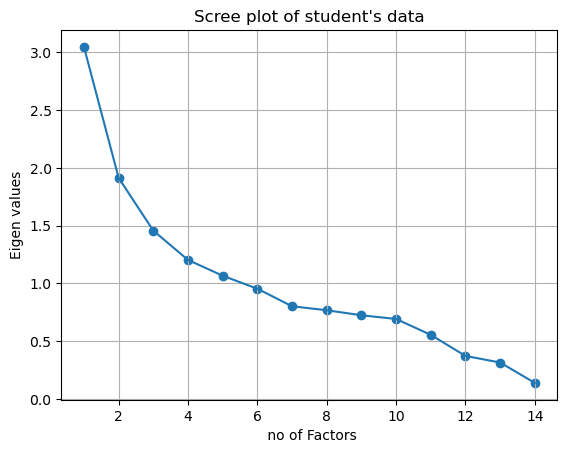

In [278]:
plt.scatter(range(1,X.shape[1]+1),eigenvector)
plt.plot(range(1,X.shape[1]+1),eigenvector)
plt.grid(True)
plt.xlabel(' no of Factors')
plt.ylabel('Eigen values')
plt.title("Scree plot of student's data")
plt.show()

In [279]:
factor_loading=pd.DataFrame(loadings,index=X.columns)

In [280]:
factor_loading

,0,1,2,3,4,5
onehot__school_MS,-0.235312,0.152353,-0.022699,0.652338,-0.002561,0.070122
onehot__schoolsup_yes,-0.165214,-0.187194,-0.042622,-0.094549,0.112595,-0.005317
onehot__higher_yes,0.049363,-0.051886,0.055405,-0.008234,0.524416,0.103189
remainder__age,0.097627,-0.026053,-0.041374,0.410517,-0.083768,0.043294
remainder__Medu,-0.122742,1.110900,0.002232,0.023370,0.269000,0.021257
remainder__Fedu,-0.007447,0.030232,0.781065,-0.089776,0.018615,-0.014666
remainder__studytime,-0.074807,0.004707,0.839864,-0.022342,-0.021160,-0.028173
remainder__failures,0.038683,0.179705,-0.055149,-0.068333,0.464952,-0.076644
remainder__goout,-0.219748,0.137917,-0.078872,-0.148474,-0.319814,-0.063066
remainder__Dalc,-0.038606,0.042975,0.019289,0.033080,0.039611,0.393819


In [281]:
factoredselected_columns = []

# Set a threshold for loading values
loading_threshold = 0.5

for factor in factor_loading.columns:
    factoredselected_columns.extend(factor_loading.index[factor_loading[factor] > loading_threshold])

factoredselected_columns = list(set(factoredselected_columns)) 
factoredselected_columns 
X=X[factoredselected_columns]
X

,remainder__Walc,remainder__Medu,remainder__G2,remainder__studytime,remainder__Fedu,remainder__G1,onehot__higher_yes,onehot__school_MS
0,1.0,4.0,6.0,2.0,4.0,5.0,1.0,0.0
1,1.0,1.0,5.0,2.0,1.0,5.0,1.0,0.0
2,3.0,1.0,8.0,2.0,1.0,7.0,1.0,0.0
3,1.0,4.0,14.0,3.0,2.0,15.0,1.0,0.0
4,2.0,3.0,10.0,2.0,3.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1039,2.0,2.0,11.0,3.0,3.0,10.0,1.0,1.0
1040,1.0,3.0,15.0,2.0,1.0,15.0,1.0,1.0
1041,1.0,1.0,12.0,2.0,1.0,11.0,1.0,1.0
1042,4.0,3.0,10.0,1.0,1.0,10.0,1.0,1.0


In [282]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
columns_to_scale = X.columns
# Create a ColumnTransformer
minmax= ColumnTransformer(transformers=[('scaler', MinMaxScaler(), columns_to_scale)],remainder='passthrough')
# Fit and transform the feature data
X2= minmax.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3, random_state=42)


In [283]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score


# Create the model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate the model using different metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)


# Print the performance metrics
print(f'R-squared: {r_squared}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Explained Variance Score: {explained_var}')



R-squared: 0.7804866509231263
Mean Squared Error (MSE): 3.2567840798454646
Mean Absolute Error (MAE): 1.0500618365180467
Explained Variance Score: 0.7805194830890883
